# Perceptron Neural Network Implementation

This notebook demonstrates the implementation of a simple Perceptron neural network using synthetic data. The notebook covers data generation, model definition, training, and visualization of the decision boundary.

### Data Generation
The following cell generates synthetic data with 2 features and 2 clusters using `make_blobs` from scikit-learn.

In [10]:
# Importing the required library to create synthetic data
from sklearn.datasets import make_blobs

# Generating synthetic data with 2 features and 2 clusters
# n_samples: Number of samples
# n_features: Number of features for each sample
# centers: Number of centers to generate
# random_state: Seed for random number generation for reproducibility
X, Y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=41)

### Data Preview
This cell prints some of the generated data points and their corresponding labels.

In [11]:
# Printing some of the generated data points (X) and their corresponding labels (Y)
print("X = ", X[: 5])
print("Y = ", Y[: 5])

X =  [[  3.29059705 -11.06454901]
 [  2.78637996  -8.78030401]
 [ -5.77222806  -9.24887243]
 [  2.43248981  -8.05817632]
 [  4.26822243 -10.09704048]]
Y =  [1 1 0 1 1]


### Label Conversion
This cell converts the labels from {0, 1} to {-1, 1} to match the perceptron's expected input.

In [12]:
# Converting labels from {0, 1} to {-1, 1}
for i in range(X.shape[0]):
  if Y[i] == 0:
    Y[i] = -1

# Printing the modified labels
print("new Y = ", Y[:5])

new Y =  [ 1  1 -1  1  1]


### Sign Function
The cell defines a helper class `F` with a static method `sign`, which returns the sign of a value.

In [13]:
class F:
  @staticmethod
  # Function to return the sign of a value
  def sign(x):
    if x >= 0:
      return 1
    else:
      return -1

### Perceptron Model
The cell defines the `Perceptron` class with methods to initialize weights and compute the forward pass.

In [14]:
import numpy as np

class Perceptron:
  # Initialize weights and bias randomly
  def __init__(self, input_size):
    self.weights = np.random.randn(input_size)
    self.bias = np.random.randn()

  # Compute weighted sum and apply activation function
  def forward(self, input):
    weighted_sum = np.dot(input, self.weights) + self.bias
    output = F.sign(weighted_sum)
    return output

### Optimizer
This cell defines the `Optimizer` class, responsible for updating the model's weights and bias based on errors.

In [15]:
class Optimizer:
  # Initialize optimizer with the model to be updated
  def __init__(self, model):
    self.model = model

  def update(self, x, y, y_hat):
    # Compute error
    error = y - y_hat

    # Update weights and bias based on error
    self.model.weights += error * x
    self.model.bias += error

### Training and Visualization
The final cell trains the perceptron model and visualizes the decision boundary along with the data points.

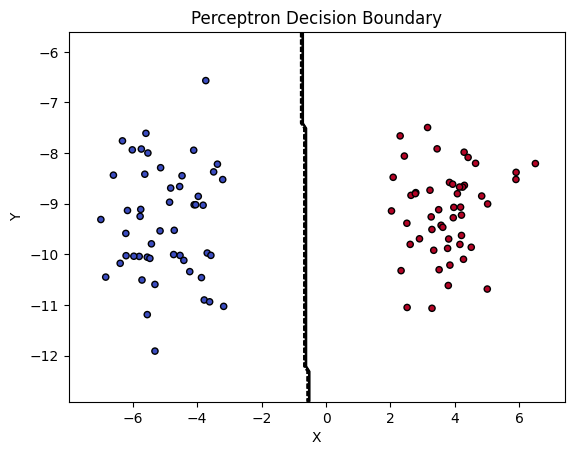

In [20]:
import matplotlib.pyplot as plt

# Initialize perceptron model and optimizer
input_size = X.shape[1]
perceptron_model = Perceptron(input_size)
optimizer = Optimizer(perceptron_model)

# Number of iterations for training
n_iter = 1000

# Train the perceptron model
for i in range(n_iter):
  for x, y in zip(X, Y):
    y_hat = perceptron_model.forward(x)
    optimizer.update(x, y, y_hat)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

# Define meshgrid for decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = np.zeros(xx.shape)

# Compute predictions for each point in the meshgrid
for i in range(xx.shape[0]):
  for j in range(xx.shape[1]):
    point = np.array([xx[i, j], yy[i, j]])
    Z[i, j] = perceptron_model.forward(point)

# Plot decision boundary
plt.contour(xx, yy, Z, colors='k', linewidths=1)

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Perceptron Decision Boundary')

# Show the plot
plt.show()